# PRCP-1000-PortugeseBank

## TEAM ID:"PTID-CDS-AUG-24-2047

## BATCH ID: 08-APR-24-CDS-BUN-021-WDM09-BAN

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know
which customer will buy the product.

Task3:-Suggestions to the Bank market team to make customers buy the product.

In [1]:
# Importing necessary libraries
import pandas as pd       # Data manipulation
import numpy as np        # Numerical operations
import seaborn as sns     # Data visualization
import matplotlib.pyplot as plt  # Plotting

from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler  # Scaling features
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics

from imblearn.over_sampling import SMOTE

import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the CSV File
df = pd.read_csv(r"C:\Users\Varun Kumar\Desktop\capstone_projects\prcp1000PortugesBank\bank_additional_full.csv", sep=';')

In [3]:
#Shape of the dataframe
df.shape

(41188, 21)

## Task 1
## Prepare a complete data analysis report on the given data.

In [4]:
#Displaying first 5 rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Displaying last 5 rows
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# **DOMAIN ANALYSIS**
This database is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from March 2008 to November 2010 which will help the bank marketing team to know which customer will buy the product.Our main objective is to predict potential customer who is likely to buy the product which will help the bank marketing team increase the sales using the given 21 feature.

## DEMOGRAPHIC INFORMATION
1)AGE:
This is the age of the customers.Understanding the age distribution helps target specific age groups for term deposits.

2)JOB:
The type of job of the customers.The occupation of the customer, which can influence income level, financial stability, and investment habits. Certain jobs might correlate with a higher likelihood of subscribing to term deposits. For example, professionals or retired individuals might show different patterns compared to blue-collar workers.

3)MARITAL:
marital statuss of the customers.Marital status, which could reflect the customer’s stage in life, financial responsibilities, and long-term saving goals.Married customers might have different financial goals compared to single or divorced customers. This could affect their likelihood to invest in products like term deposits.

4)EDUCATION: 
Educational background of the customers.Educational background can influence financial literacy and the likelihood of subscribing to complex financial products like term deposits.Higher education may correlate with a better understanding of financial products, making certain segments more likely to subscribe.

## FINANCIAL INFORMATION

5)DEFAULT:
This shows customers information whether they hdave ef not.Indicates whether the customer has credit in default, which reflects the customer’s financial health and credit risk.Customers in default might be less likely to subscribe to new financial products, as they are already in a financially constrained position.

6)HOUSEING
This has customers information whether they  home loan or not.This reflects the customer’s existing financial commitments and priorities.Customers with housing loans might have different savings or investment behaviors. They may prioritize paying off loans over subscribing to new financial products.

7)LOAN:
Customers information whether they personal loan or not. not.Indicates whether the customer has a personal loan, another sign of financial obligations.Similar to housing loans, personal loans can impact a customer’s likelihood to invest in additional financial product.

##  Related with the last contact of current campaign

8)CONTACT:
This has type of communication channel used (cellular or telephone).The effectiveness of the communication channel might vary. For example, mobile phone contacts could yield higher success rates if the customers are more respone.

9)MONTH:
The last contacted month of the year. Campaign timing may influence success due to seasonal effects.Certain months might yield better results depending on economic conditions or customer behavior (e.g., end of the financial year when people receive bonus.

10)DAY OF THE WEEK:
The day of the week when the contact was made. Timing during the week can affect customer receptivity.Different days may show varied response rates based on customer availability or mindset (e.g., customers might be more receptive on weekends or specific week.

11)DURATION:
The duration of the last contact in seconds, which may indicate customer interest.Longer calls might indicate higher customer engagement, but this variable is tricky as it can’t be known before the call is made.this attribute higly affects output variable y.Also, after the end of the call y is obviously known.Thus, this input should only be included for beochmark.

12)CAMPAIGN:
The number of contacts performed during this campaign for the customer.This provides insights into the customer’s engagement and the bank’s persistence. More contacts maythe likelihood of a response but could also lead to diminishing returns or customer fatigue.

13)PDAYS:
The number of days since the client was last contacted in a previous campaign.A value of 999 means the customer wasn’t previously contacted.Customers contacted recently might recall previous interactions and respond differently compared to those contacted a long time ago or never before.

14)PREVIOUS
The number of contacts performed before the current campaign.This helps track customer engagement across campaigns. Higher values could indicate either persistent interest or annoyance.

15)POUTCOME:
The outcome of the previous campaign (failure, nonexistent, or success).If a customer previously subscribed after a campaign, they might be more likely to do so again. Conversely, a past failure could suggest the customer is hardly interested.

## SOCIAL AND ECONOMICAL FEATURES

16)EMP.VAR.RATE:
The employment variation rate, a quarterly indicator that shows economic health.A stronger job market may lead to more subscriptions, as customers feel more financially secure.

17)CONS.PRICE.IDX:
The consumer price index, a monthly indicator of inflation.Higher inflation could affect customers' decisions to invest in long-term financial products like term deposits.

18)CONS.CONF.IDX:
The consumer confidence index, which reflects consumer sentiment regarding economic conditions.If consumer confidence is high, customers might be more willing to commit to term deposits.

19)EURIBOR3M:
The 3-month Euribor rate, a key interest rate that reflects short-term European money market trends.Changes in interest rates can significantly affect customer behavior toward saving and investing. Higher rates might encourage more customers to lock in favorable terms deposits.

20)NR.EMPLOYEED:
The number of employees, another quarterly economic indicator.A larger workforce suggests a strong economy, potentially leading to more positive responses to the marketing.

## TARGET VARIABLE
21)Y:
Whether the customer subscribed to a term deposit. This is the target variable the model is designed to predict.The key metric to be analyzed. Patterns and relationships between this variable and the inputs are critical to understanding customer behavior and improving campaign.

In [6]:
#Getting info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
#Description of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
#Description of categorical columns
df.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


# INSIGHTS

1) The dataset is customers dataset for potential customers of term deposits with  **41188 datapoints having 21 features** including target variable.

2) Dataset having both **numerical(10) as well as categorical values(11)** with some unknown values is there in "job", "marital", "default", "education", "housing", "loan" columns and **no null values**.

3) The maximum age of the customers is **98**, where as minimum is 17.

4) The maximum duration of the call of the customers is **4918** seconds, where as minimum is **0** seconds.

5) Most of the customers have **university degree** education.
   
6) Most of the customers have been contacted through **cellular** and most customers have picked the calls on **thursday**.

In [10]:
#checking for null values
df.isnull().sum()/len(df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [11]:
# Counting 'unknown' values which are considered as missing in the dataset
print((df == 'unknown').sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [12]:
#Checking unknown values in Ascending order for better understanding
unknown_summary = df.apply(lambda x: x[x == 'unknown'].count())
unknown_summary = unknown_summary[unknown_summary > 0].sort_values(ascending=False)
print(unknown_summary)

default      8597
education    1731
housing       990
loan          990
job           330
marital        80
dtype: int64


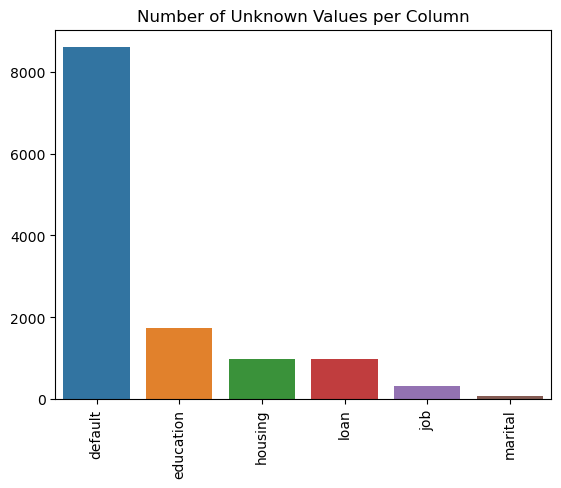

In [13]:
# Visualizing the distribution of 'unknown' values across columns
sns.barplot(x=unknown_summary.index, y=unknown_summary.values)
plt.xticks(rotation=90)
plt.title('Number of Unknown Values per Column')
plt.show()

In [14]:
# Checking the distribution of the target variable
print(df['y'].value_counts(normalize=True))

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


<Axes: xlabel='y', ylabel='count'>

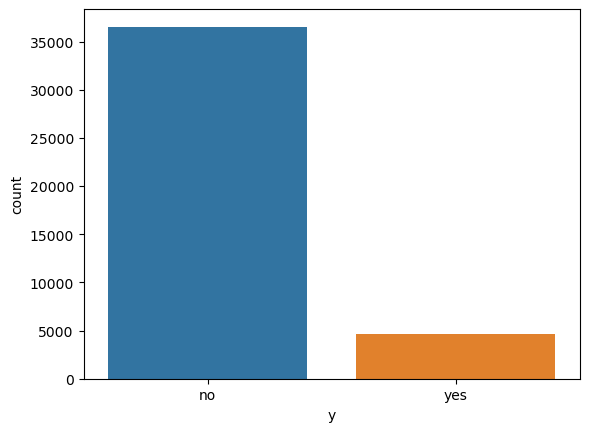

In [15]:
#Visualising the target variable
sns.countplot(data=df, x='y')

In [16]:
# Converting the target variable 'y' to binary (0/1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# EDA

## AGE

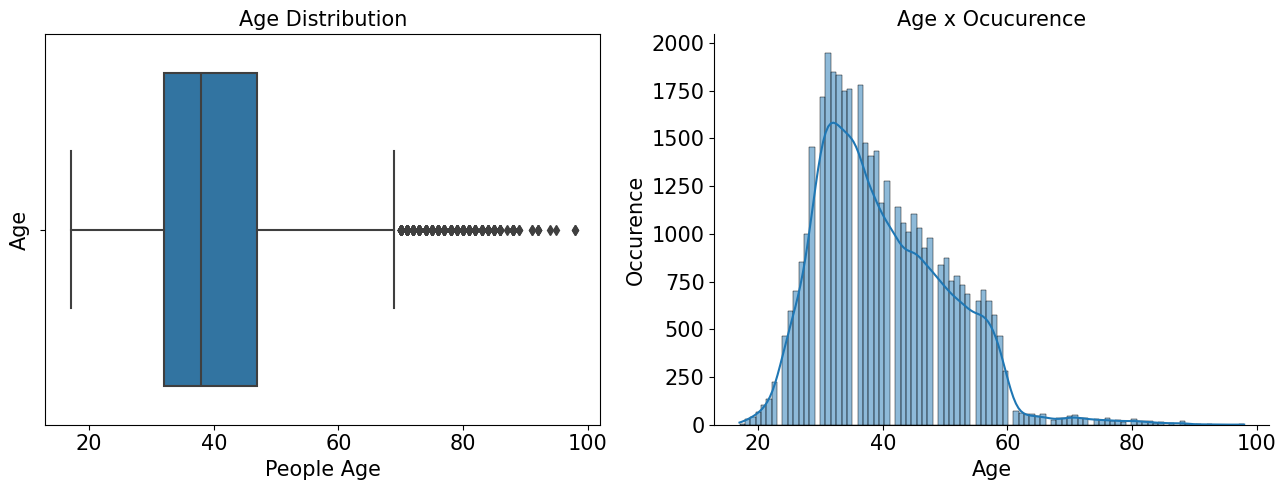

In [17]:
#Visualising age
sfig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.histplot(df['age'], kde=True, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [18]:
#Info about Age Distribution
print('Min age: ', df['age'].min())
print('Max age: ', df['age'].max())
print('Null Values: ', df['age'].isnull().any())

Min age:  17
Max age:  98
Null Values:  False


In [19]:
# Quartiles
print('1º Quartile: ', df['age'].quantile(q = 0.25))
print('2º Quartile: ', df['age'].quantile(q = 0.50))
print('3º Quartile: ', df['age'].quantile(q = 0.75))
print('4º Quartile: ', df['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [20]:
print('Numerber of outliers: ', df[df['age'] > 69.6]['age'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['age'] > 69.6]['age'].count()*100/len(df),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [21]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(df['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(df['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(df['age'].std()*100/df['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


In [22]:
### 6. Handling Job Variable
# Cross-tabulating 'job' with 'y'
job_crosstab = pd.crosstab(df['job'], df['y'], normalize='index')
print(job_crosstab)
# Dropping rows where 'job' is 'unknown'
df = df[df['job'] != 'unknown']

y                     0         1
job                              
admin.         0.870274  0.129726
blue-collar    0.931057  0.068943
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747674  0.252326
self-employed  0.895144  0.104856
services       0.918619  0.081381
student        0.685714  0.314286
technician     0.891740  0.108260
unemployed     0.857988  0.142012
unknown        0.887879  0.112121


## JOB

No Error


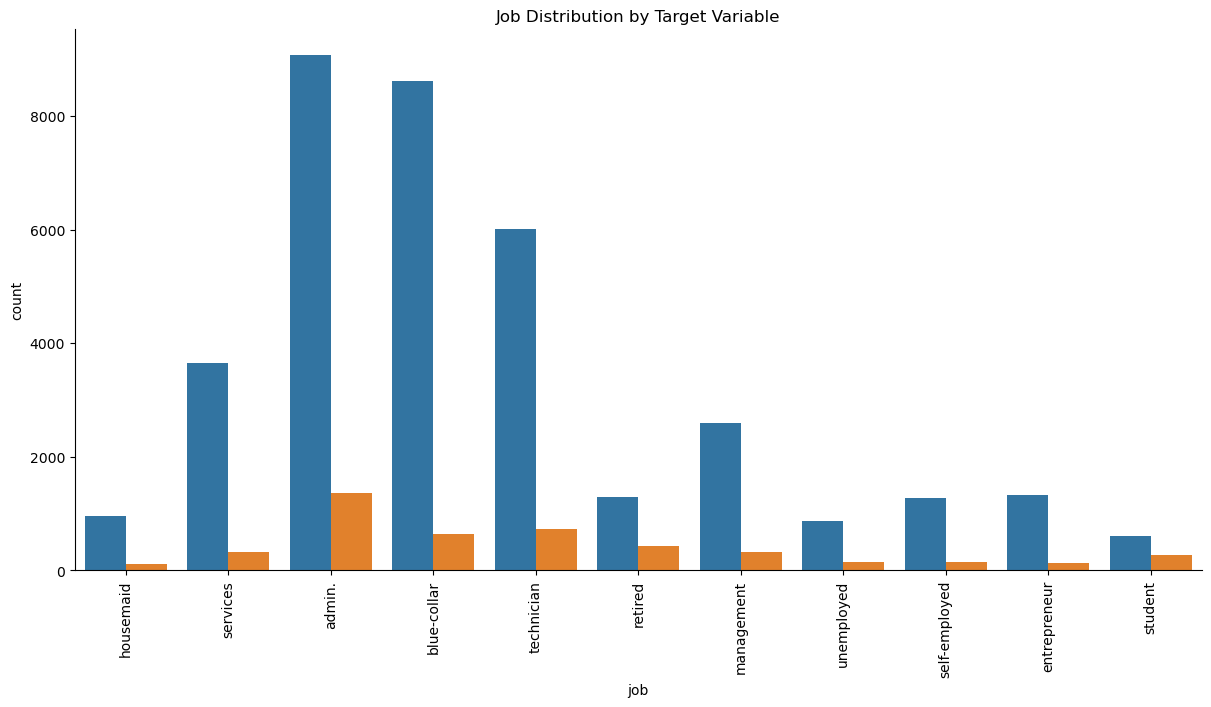

In [23]:
# Visualizing job distribution by target variable
try:
    sns.catplot(data=df, x='job', hue='y', kind='count', height=6, aspect=2)
except AttributeError:
    print("No Error")
plt.xticks(rotation=90)
plt.title('Job Distribution by Target Variable')
plt.show()

## Cross-tabulating 'marital' with 'y'

In [24]:
marital_crosstab = pd.crosstab(df['marital'], df['y'], normalize='index')
print(marital_crosstab)

y                0         1
marital                     
divorced  0.897152  0.102848
married   0.898113  0.101887
single    0.860362  0.139638
unknown   0.873239  0.126761


In [25]:
df = df[df['marital'] != 'unknown']

no error


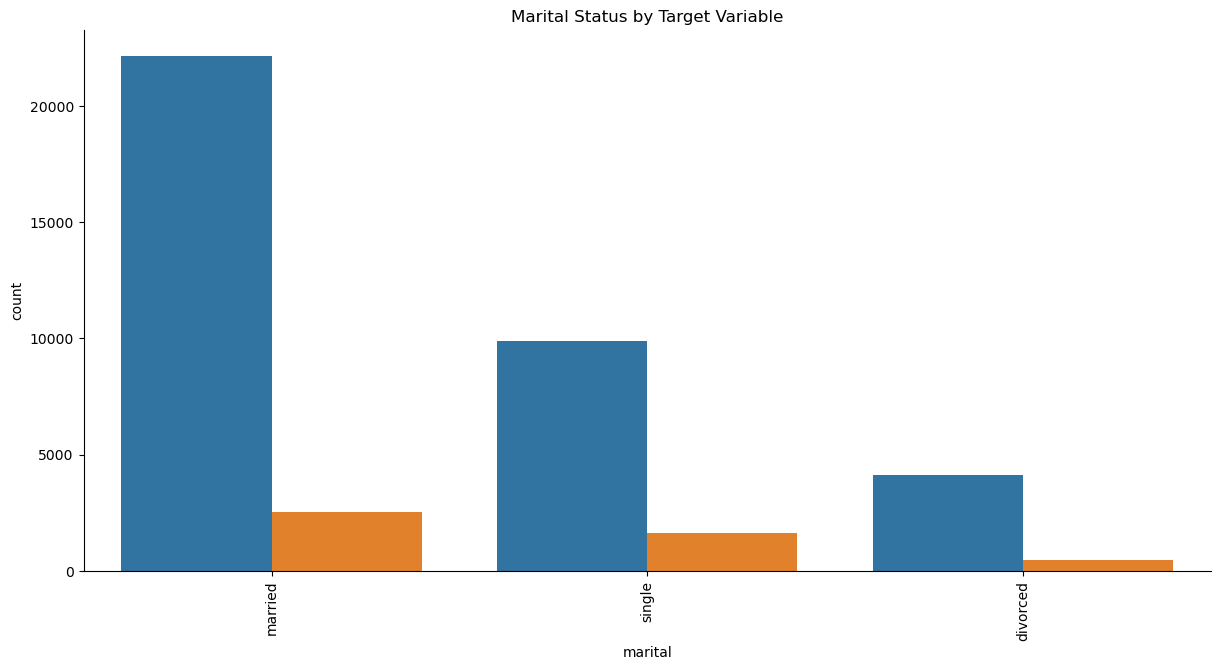

In [26]:
try:
    sns.catplot(data=df, x='marital', hue='y', kind='count', height=6, aspect=2)
except AttributeError:
    print("no error")
plt.xticks(rotation=90)
plt.title('Marital Status by Target Variable')
plt.show()

## Education

In [27]:

education_crosstab = pd.crosstab(df['education'], df['y'], normalize='index')
print(education_crosstab)

y                           0         1
education                              
basic.4y             0.897280  0.102720
basic.6y             0.917403  0.082597
basic.9y             0.921745  0.078255
high.school          0.891378  0.108622
illiterate           0.777778  0.222222
professional.course  0.886316  0.113684
university.degree    0.863261  0.136739
unknown              0.853383  0.146617


In [28]:
#Replacing unknown in education with university degree
df['education'] = df['education'].replace('unknown', 'university.degree')

no error


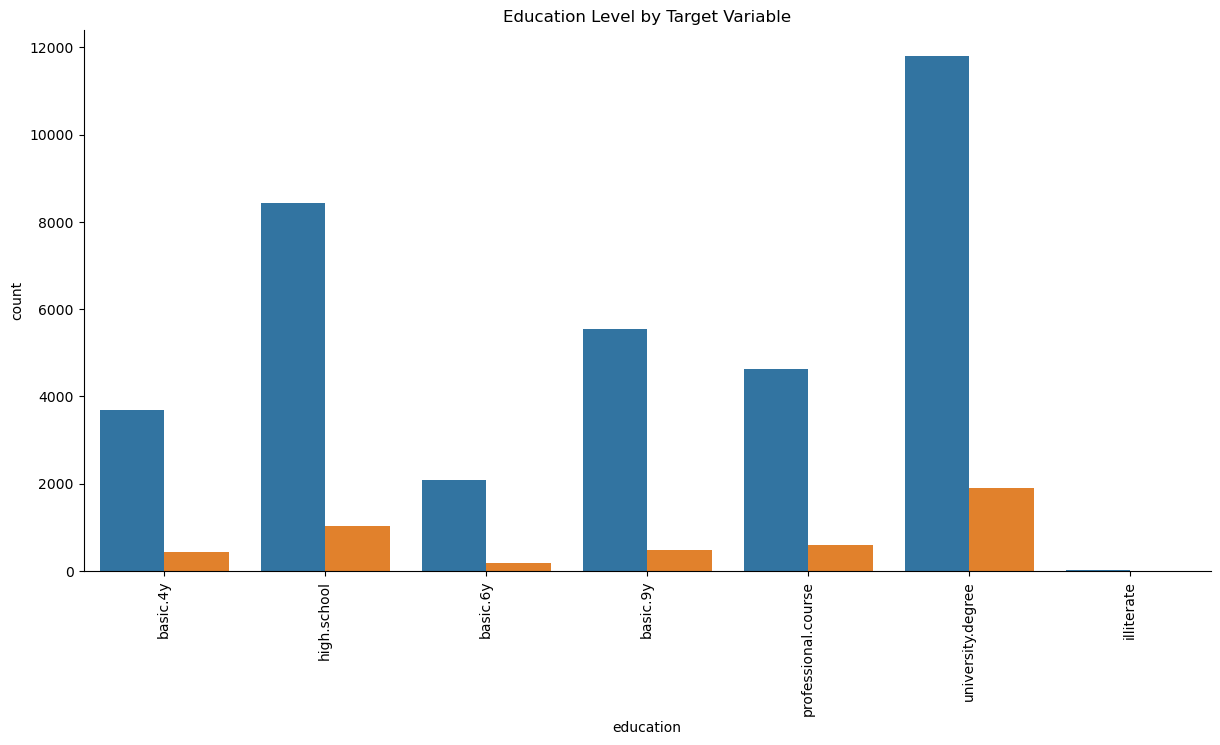

In [29]:
try:
    sns.catplot(data=df, x='education', hue='y', kind='count', height=6, aspect=2)
except AttributeError:
    print("no error")
plt.xticks(rotation=90)
plt.title('Education Level by Target Variable')
plt.show()

## Default, housing, loan

no error


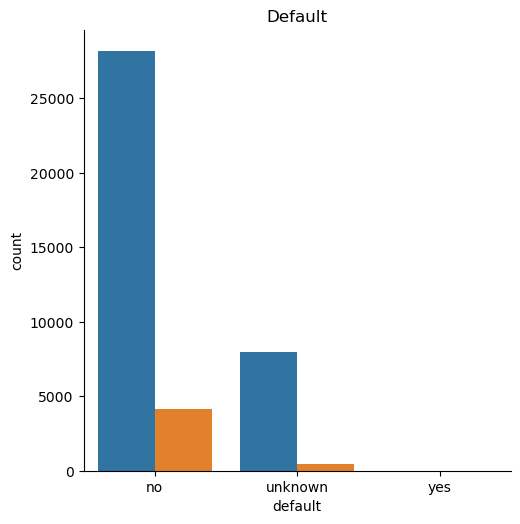

In [30]:

try:
    sns.catplot(x = 'default', hue='y', kind="count", data = df, order = ['no', 'unknown', 'yes'])
except AttributeError:
    print("no error")
plt.title('Default')
plt.show()

no error


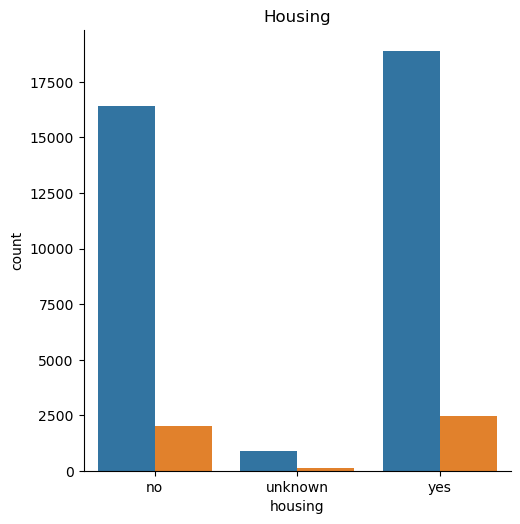

In [31]:

# Housing, has housing loan ?
try:
    sns.catplot(x = 'housing',  hue='y', kind="count", data = df, order = ['no', 'unknown', 'yes'])
except AttributeError:
    print("no error")
plt.title("Housing")
plt.show()

no error


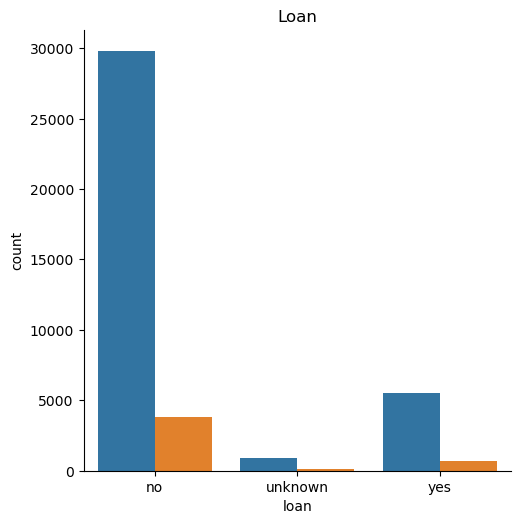

In [32]:
# Loan, has personal loan ?
try:
    sns.catplot(x = 'loan', hue='y', kind="count", data = df, order = ['no', 'unknown', 'yes'])
except AttributeError:
    print("no error")
plt.title("Loan")
plt.show()

In [33]:
df['default'].value_counts()

default
no         32348
unknown     8436
yes            3
Name: count, dtype: int64

In [34]:
df['housing'].value_counts()

housing
yes        21376
no         18427
unknown      984
Name: count, dtype: int64

In [35]:
df['loan'].value_counts()

loan
no         33620
yes         6183
unknown      984
Name: count, dtype: int64

## Label encoder order 

In [36]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan'])

## Contact, month and day of the week

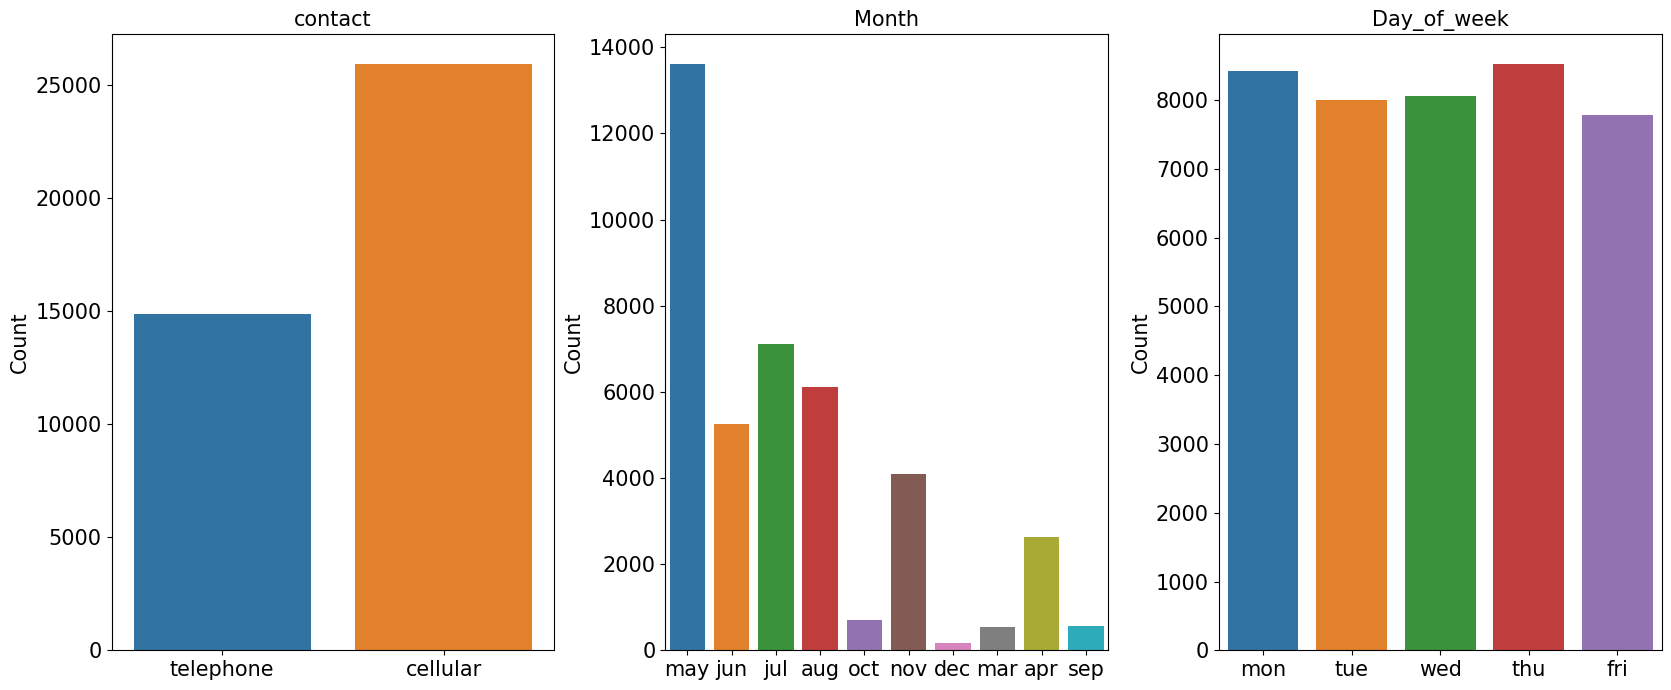

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'contact', data = df, ax = ax1, order = ['telephone', 'cellular'])
ax1.set_title('contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)


sns.countplot(x = 'month', data = df, ax = ax2, order = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'])
ax2.set_title('Month', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'day_of_week', data = df, ax = ax3, order = ['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_title('Day_of_week', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

no error


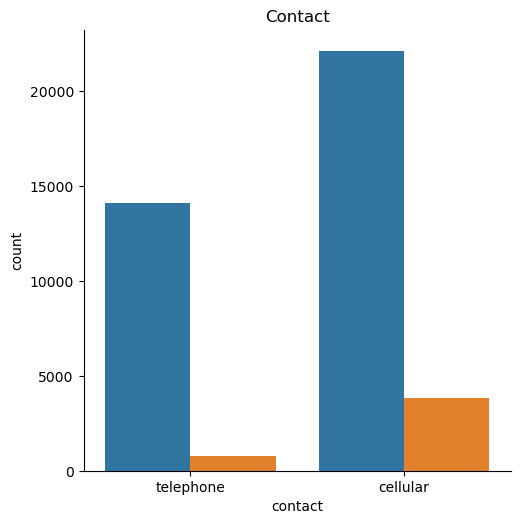

In [38]:
#Visualizing contact
try:
    sns.catplot(x = 'contact', hue="y", data = df, kind="count",  order = ['telephone', 'cellular'])
except AttributeError:
    print("no error")
plt.title("Contact")
plt.show()

no error


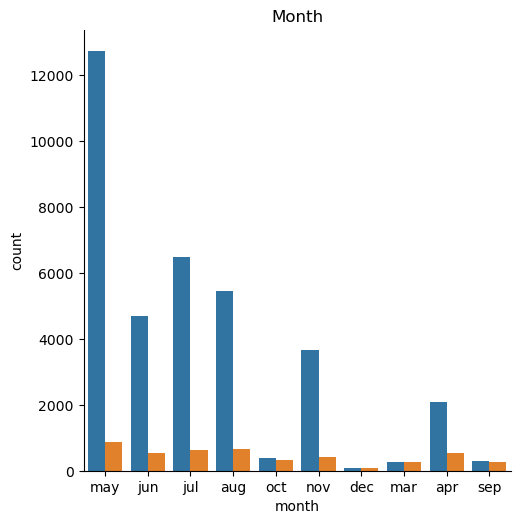

In [39]:
#Visualizing contacted Month
try:
    sns.catplot(x = 'month', hue="y", data = df, kind="count", order = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'])
except AttributeError:
    print("no error")
plt.title("Month")
plt.show()

no error


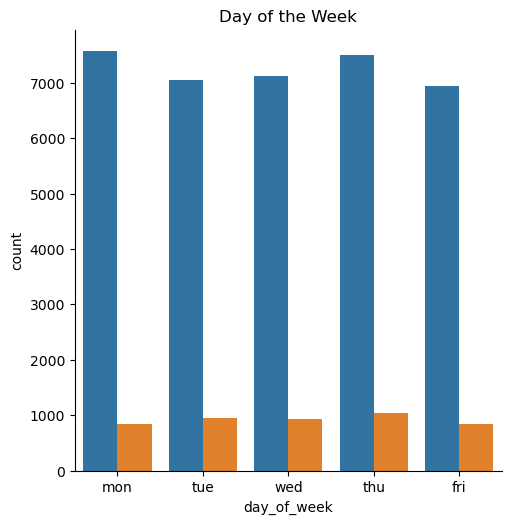

In [40]:
#Visualizing contacted day of the week
try:
    sns.catplot(x = "day_of_week", hue="y", data = df, kind="count", order = ['mon', 'tue', 'wed', 'thu', 'fri'])
except AttributeError:
    print("no error")
plt.title("Day of the Week")
plt.show()

## Call duration

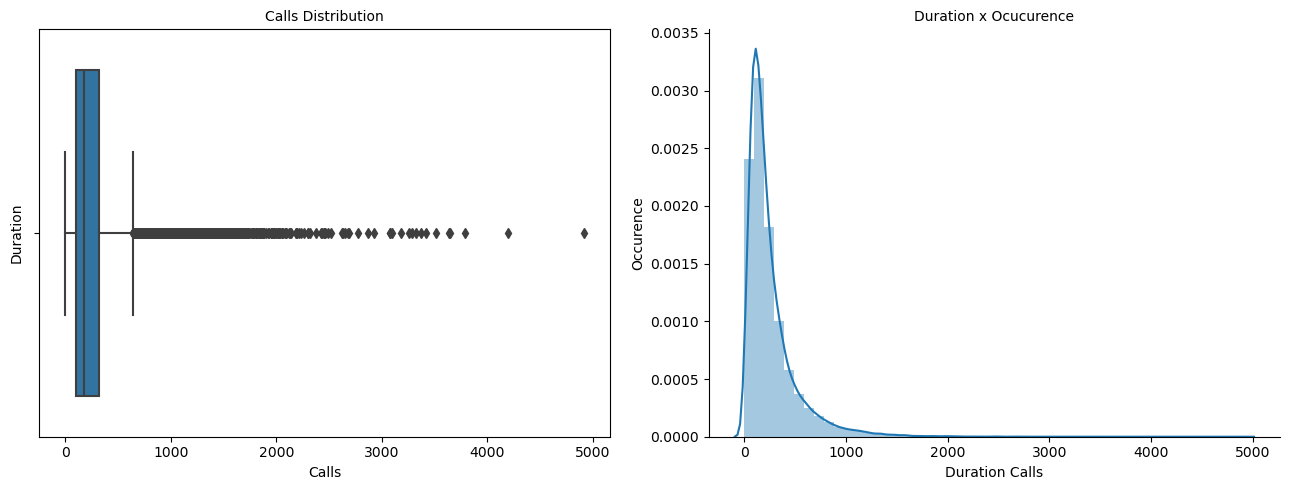

In [41]:
#Visualizing call duration
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [42]:
print("Max duration  call in minutes:  ", round((df['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((df['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((df['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((df['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [43]:
# Quartiles
print('1º Quartile: ', df['duration'].quantile(q = 0.25))
print('2º Quartile: ', df['duration'].quantile(q = 0.50))
print('3º Quartile: ', df['duration'].quantile(q = 0.75))
print('4º Quartile: ', df['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', df['duration'].quantile(q = 0.75) + 
                      1.5*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.5
4º Quartile:  4918.0
Duration calls above:  645.75 are outliers


In [44]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed,  
df[(df['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,0,1,3,0,2,0,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
23031,59,4,1,6,0,2,0,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
28063,53,1,0,3,0,2,0,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0
33015,31,1,1,2,0,0,0,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


In [45]:
# THIS LINES NEED TO BE DELETED 
df=df[df["duration"]!=0]

In [46]:
print('Numerber of outliers: ', df[df['duration'] > 645.75]['duration'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['duration'] > 645.75]['duration'].count()*100/len(df),2), '%')

Numerber of outliers:  2927
Number of clients:  40783
Outliers are: 7.18 %


In [47]:
#Encoding Contact, Month and Day of the week
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['contact']     = labelencoder_X.fit_transform(df['contact']) 
df['month']       = labelencoder_X.fit_transform(df['month']) 
df['day_of_week'] = labelencoder_X.fit_transform(df['day_of_week'])

In [48]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(df);

In [49]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [50]:
df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [52]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,4,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,2,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,3,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,2,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,4,5,1,5,0,2,0,0,7,0,...,3,999,1,2,-1.1,94.767,-50.8,1.028,4963.6,0


In [53]:
#Y variable value counts
df['y'].value_counts()

y
0    36189
1     4594
Name: count, dtype: int64

In [54]:
#Splitting the dataset
X = df.drop(columns=['y'])
Y = df['y']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25, random_state=16)

In [55]:
#SMOTING THE DATA
sm = SMOTE(random_state=0)

X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)

pd.Series(y_SMOTE).value_counts()

y
0    27140
1    27140
Name: count, dtype: int64

In [56]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_SMOTE)
X_test_scaled = scaler.transform(X_test)

# Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.


## Logistic Regression

In [57]:

from sklearn.linear_model import LogisticRegression
# Initializing and training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_SMOTE)
# Predicting and evaluating
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression:")
print(confusion_matrix(Y_test, y_pred_log_reg))
print(classification_report(Y_test, y_pred_log_reg))

Logistic Regression:
[[8019 1030]
 [ 255  892]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      9049
           1       0.46      0.78      0.58      1147

    accuracy                           0.87     10196
   macro avg       0.72      0.83      0.75     10196
weighted avg       0.91      0.87      0.89     10196



In [58]:
x_pred_log_reg = log_reg.predict(X_train_scaled)
print(classification_report(y_SMOTE,x_pred_log_reg))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     27140
           1       0.88      0.90      0.89     27140

    accuracy                           0.89     54280
   macro avg       0.89      0.89      0.89     54280
weighted avg       0.89      0.89      0.89     54280



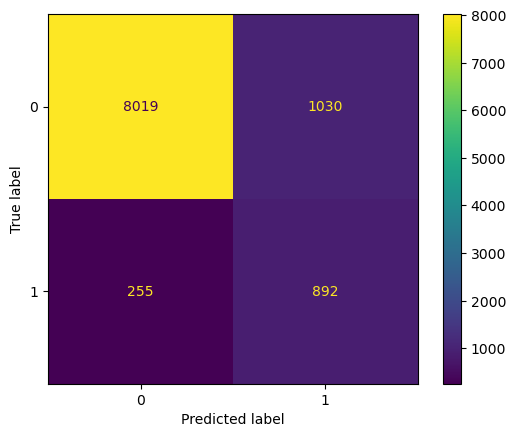

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test_scaled, Y_test)
plt.show()

## SVM 

In [60]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train_scaled, y_SMOTE)

#Predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test_scaled)


In [61]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("SVM:")
print(confusion_matrix(Y_test, y_pred_svm))
print(classification_report(Y_test, y_pred_svm))

SVM:
[[7916 1133]
 [ 224  923]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      9049
           1       0.45      0.80      0.58      1147

    accuracy                           0.87     10196
   macro avg       0.71      0.84      0.75     10196
weighted avg       0.91      0.87      0.88     10196



In [62]:
x_pred_svm_train = clf_svm.predict(X_train_scaled)
print(classification_report(y_SMOTE,x_pred_svm_train))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     27140
           1       0.88      0.91      0.89     27140

    accuracy                           0.89     54280
   macro avg       0.89      0.89      0.89     54280
weighted avg       0.89      0.89      0.89     54280



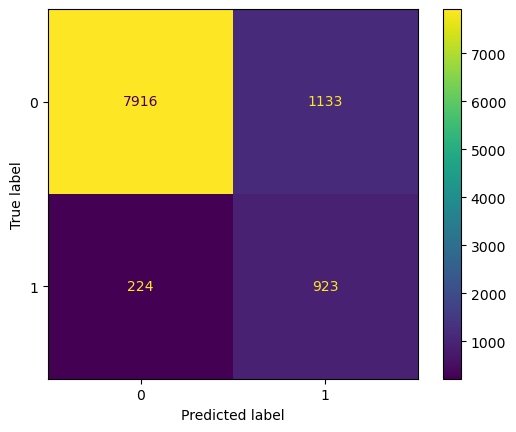

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    clf_svm, X_test_scaled, Y_test)
plt.show()

##  XGBOOST

In [64]:
# import XGBClassifier
from xgboost import XGBClassifier
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)
# fit the classifier to the training data
xgb_clf.fit(X_train_scaled, y_SMOTE)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [65]:
y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [66]:
print("XGBoost:")
print(confusion_matrix(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))

XGBoost:
[[8418  631]
 [ 356  791]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9049
           1       0.56      0.69      0.62      1147

    accuracy                           0.90     10196
   macro avg       0.76      0.81      0.78     10196
weighted avg       0.91      0.90      0.91     10196



In [67]:
x_pred_xgb = xgb_clf.predict(X_train_scaled)
print(classification_report(y_SMOTE,x_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     27140
           1       0.95      0.96      0.95     27140

    accuracy                           0.95     54280
   macro avg       0.95      0.95      0.95     54280
weighted avg       0.95      0.95      0.95     54280



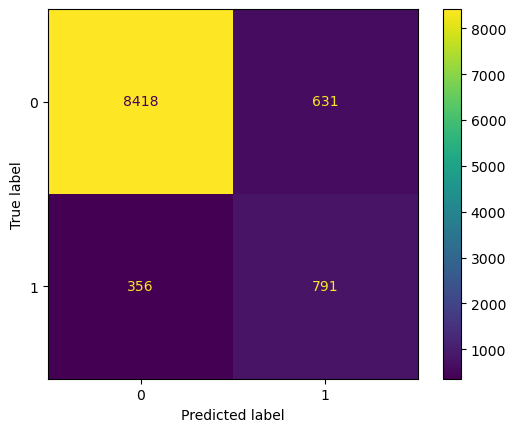

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test_scaled, Y_test)
plt.show()

## ANN

In [69]:
## ANN model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,25),activation='relu',solver='adam',
                       learning_rate_init=0.1,alpha=0.01,
                       max_iter=1000,n_iter_no_change=100,
                       random_state=10,verbose=True,batch_size=100)        ## model object creation max_iter=Stopping parameter
model.fit(X_train_scaled,y_SMOTE)  

Iteration 1, loss = 0.30714479
Iteration 2, loss = 0.28788297
Iteration 3, loss = 0.27922333
Iteration 4, loss = 0.27096502
Iteration 5, loss = 0.27159240
Iteration 6, loss = 0.26987533
Iteration 7, loss = 0.26805712
Iteration 8, loss = 0.26628142
Iteration 9, loss = 0.26426432
Iteration 10, loss = 0.26553464
Iteration 11, loss = 0.26519676
Iteration 12, loss = 0.26610304
Iteration 13, loss = 0.26385746
Iteration 14, loss = 0.26251663
Iteration 15, loss = 0.26489329
Iteration 16, loss = 0.26392460
Iteration 17, loss = 0.26246489
Iteration 18, loss = 0.26456816
Iteration 19, loss = 0.26872072
Iteration 20, loss = 0.26567181
Iteration 21, loss = 0.26049463
Iteration 22, loss = 0.26266558
Iteration 23, loss = 0.26475618
Iteration 24, loss = 0.26449237
Iteration 25, loss = 0.26926071
Iteration 26, loss = 0.26916646
Iteration 27, loss = 0.26325075
Iteration 28, loss = 0.26573460
Iteration 29, loss = 0.26967662
Iteration 30, loss = 0.26365769
Iteration 31, loss = 0.26342295
Iteration 32, los

MLPClassifier(alpha=0.01, batch_size=100, hidden_layer_sizes=(50, 25),
              learning_rate_init=0.1, max_iter=1000, n_iter_no_change=100,
              random_state=10, verbose=True)

In [70]:
#y_predict_proba = model.predict_proba(X_test)        ## predicting the probability of class

y_predict = model.predict(X_test_scaled)
y_train_predict = model.predict(X_train_scaled)

In [71]:
y_predict = model.predict(X_test_scaled)
y_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [72]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_SMOTE,y_train_predict))
print("Test accuracy :",accuracy_score(Y_test,y_predict))

Train accuracy : 0.8933124539425202
Test accuracy : 0.8691643781875246


In [73]:
## getting the confusion matrix
pd.crosstab(y_predict,Y_test)

y,0,1
row_0,,
0,7959,244
1,1090,903


In [74]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      9049
           1       0.45      0.79      0.58      1147

    accuracy                           0.87     10196
   macro avg       0.71      0.83      0.75     10196
weighted avg       0.91      0.87      0.88     10196



In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_SMOTE,y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     27140
           1       0.88      0.91      0.90     27140

    accuracy                           0.89     54280
   macro avg       0.89      0.89      0.89     54280
weighted avg       0.89      0.89      0.89     54280



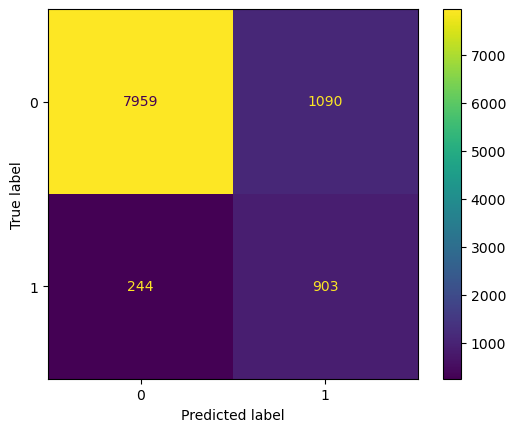

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model, X_test_scaled, Y_test)
plt.show()

## Decision Tree

In [77]:
# Initializing and training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_SMOTE)
# Predicting and evaluating
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree:")
print(confusion_matrix(Y_test, y_pred_dt))
print(classification_report(Y_test, y_pred_dt))

Decision Tree:
[[8336  713]
 [ 512  635]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9049
           1       0.47      0.55      0.51      1147

    accuracy                           0.88     10196
   macro avg       0.71      0.74      0.72     10196
weighted avg       0.89      0.88      0.88     10196



In [78]:
x_pred_dt_train = dt_model.predict(X_train_scaled)
print(classification_report(y_SMOTE,x_pred_dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27140
           1       1.00      1.00      1.00     27140

    accuracy                           1.00     54280
   macro avg       1.00      1.00      1.00     54280
weighted avg       1.00      1.00      1.00     54280



In [79]:
#Define hyperparameters for Decision tree

dt_params = {'criterion':['gini','entropy'],
            'splitter':['best','random'],
             'max_depth': [None,10, 20, 30],
             'min_samples_leaf':[1,2,4]
            }

In [80]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(X_train_scaled, y_SMOTE)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'splitter': ['best', 'random']})

In [81]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.26882234, 0.09380984, 0.2576149 , 0.09460621, 0.24721804,
        0.08800583, 0.19690585, 0.07060838, 0.18861346, 0.06780429,
        0.18821297, 0.07100515, 0.25381713, 0.09240561, 0.25361776,
        0.08920593, 0.24741812, 0.08920598, 0.26241903, 0.10020704,
        0.25542207, 0.09320688, 0.2466146 , 0.0874094 , 0.26121559,
        0.09560719, 0.25601854, 0.09240623, 0.25381832, 0.08660564,
        0.2116672 , 0.07100496, 0.1974134 , 0.07320447, 0.20201817,
        0.06920495, 0.25941482, 0.0914063 , 0.25341849, 0.08860593,
        0.24722161, 0.09060283, 0.26121898, 0.09760675, 0.25441866,
        0.0932065 , 0.24881802, 0.09800615]),
 'std_fit_time': array([0.01493129, 0.0038666 , 0.01712471, 0.00287056, 0.00806033,
        0.00178886, 0.00885019, 0.00294308, 0.00553592, 0.00285678,
        0.00570663, 0.00126561, 0.00858919, 0.00135654, 0.0134264 ,
        0.00231523, 0.0077621 , 0.00581075, 0.01209354, 0.00899816,
        0.01397937, 0.00213532, 0.010

In [82]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.268822,0.014931,0.003198,4.012444e-04,gini,None,1,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.823231,0.946758,0.943441,0.943165,0.940494,0.919418,0.048134,6
1,0.093810,0.003867,0.003202,4.000435e-04,gini,None,1,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.820836,0.937638,0.937085,0.940125,0.934506,0.914038,0.046635,22
2,0.257615,0.017125,0.003002,7.478899e-07,gini,None,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.812362,0.943165,0.939941,0.940770,0.938099,0.914867,0.051279,15
3,0.094606,0.002871,0.003001,4.264961e-07,gini,None,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.802598,0.935335,0.934967,0.936809,0.926032,0.907148,0.052413,35
4,0.247218,0.008060,0.002801,4.001381e-04,gini,None,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.819823,0.940586,0.938007,0.939849,0.935520,0.914757,0.047499,17
5,0.088006,0.001789,0.003201,3.998757e-04,gini,None,4,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.813191,0.932019,0.930822,0.930453,0.925111,0.906319,0.046625,38
6,0.196906,0.008850,0.003000,5.917394e-07,gini,10,1,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.847642,0.925203,0.925847,0.926308,0.921426,0.909285,0.030870,29
7,0.070608,0.002943,0.002797,3.985700e-04,gini,10,1,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.823508,0.914886,0.912767,0.909819,0.900516,0.892299,0.034744,43
8,0.188613,0.005536,0.002601,4.900573e-04,gini,10,2,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.845707,0.924650,0.926308,0.926216,0.921057,0.908788,0.031597,30
9,0.067804,0.002857,0.002601,4.898434e-04,gini,10,2,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.821021,0.910464,0.908254,0.914702,0.897568,0.890402,0.035148,44


In [83]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [84]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(X_test_scaled)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(Y_test, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(Y_test, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.8901530011769321
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9049
           1       0.51      0.60      0.55      1147

    accuracy                           0.89     10196
   macro avg       0.73      0.76      0.74     10196
weighted avg       0.90      0.89      0.89     10196



In [85]:
x_pred_dt_train_gs = dt_grid_search.predict(X_train_scaled)
print(classification_report(y_SMOTE,x_pred_dt_train_gs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27140
           1       1.00      1.00      1.00     27140

    accuracy                           1.00     54280
   macro avg       1.00      1.00      1.00     54280
weighted avg       1.00      1.00      1.00     54280



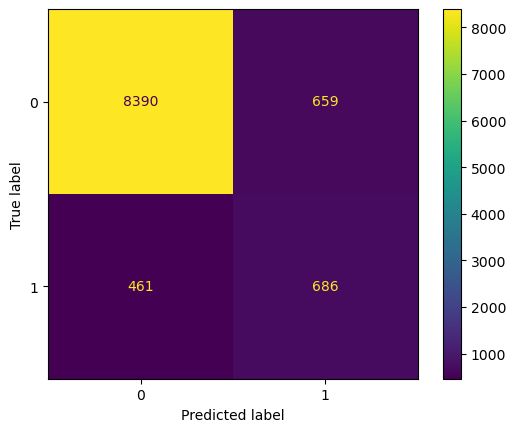

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    dt_grid_search, X_test_scaled, Y_test)
plt.show()

## Random Forest

In [87]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_SMOTE)

RandomForestClassifier(random_state=42)

In [88]:
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest:")
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

Random Forest:
[[8516  533]
 [ 399  748]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9049
           1       0.58      0.65      0.62      1147

    accuracy                           0.91     10196
   macro avg       0.77      0.80      0.78     10196
weighted avg       0.91      0.91      0.91     10196



In [89]:
x_pred_rf_train = rf_model.predict(X_train_scaled)
print(classification_report(y_SMOTE,x_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27140
           1       1.00      1.00      1.00     27140

    accuracy                           1.00     54280
   macro avg       1.00      1.00      1.00     54280
weighted avg       1.00      1.00      1.00     54280



In [90]:
rf_params = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 

In [91]:
random_search = RandomizedSearchCV(RandomForestClassifier(), 
								rf_params) 
random_search.fit(X_train_scaled, y_SMOTE) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=50)


In [92]:
model_random = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)
model_random.fit(X_train_scaled, y_SMOTE) 
y_pred_rand =model_random.predict(X_test_scaled) 
print(classification_report(y_pred_rand, Y_test)) 

              precision    recall  f1-score   support

           0       0.82      0.98      0.90      7552
           1       0.90      0.39      0.54      2644

    accuracy                           0.83     10196
   macro avg       0.86      0.69      0.72     10196
weighted avg       0.84      0.83      0.80     10196



In [93]:
x_pred_rf_train_random = model_random.predict(X_train_scaled)
print(classification_report(y_SMOTE,x_pred_rf_train_random))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     27140
           1       0.84      0.94      0.89     27140

    accuracy                           0.88     54280
   macro avg       0.89      0.88      0.88     54280
weighted avg       0.89      0.88      0.88     54280



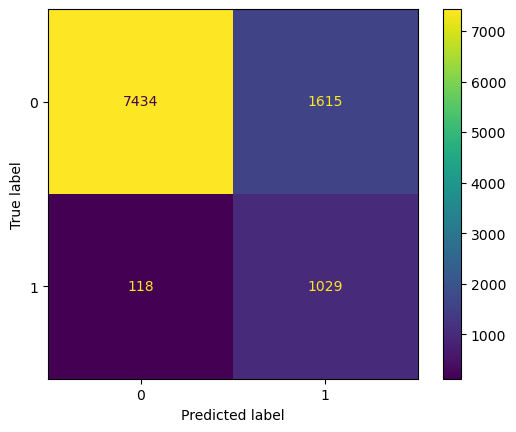

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model_random, X_test_scaled, Y_test)
plt.show()

# Model Comparison Report

## Create a report stating the performance of multiple models on this data and suggest the best model for production.

### RECALL SCORE

In [95]:
pd.DataFrame(data = [recall_score(Y_test,y_pred_log_reg, average='weighted'),
recall_score(Y_test,y_pred_svm, average='weighted'),
recall_score(Y_test,y_pred_xgb, average='weighted'),
recall_score(Y_test,y_predict, average='weighted'),
recall_score(Y_test,y_pred_dt_gs, average='weighted'),
recall_score(Y_test,y_pred_rand, average='weighted')],index=['Logistic','SVM','XGB','ANN','DT','RF'],         
columns=['Recall Score']).sort_values(by='Recall Score',ascending=False)
#print(dt_plotting_)

,Recall Score
XGB,0.903197
DT,0.890153
Logistic,0.873970
ANN,0.869164
SVM,0.866909
RF,0.830031


### ROC SCORE

In [96]:
from sklearn.metrics import roc_auc_score
pd.DataFrame(data = [roc_auc_score(Y_test,log_reg.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,xgb_clf.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,model.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,dt_grid_search.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,model_random.predict_proba(X_test_scaled)[:,1])],index=['Logistic','XGB','ANN','DT','RF'],         
columns=['ROC SCORE']).sort_values(by='ROC SCORE',ascending=False)
#The ROC SCORE requires probability estimates (or at least a realistic rank-ordering), which one-class SVM doesn't really try to produce.

,ROC SCORE
XGB,0.939832
ANN,0.918197
RF,0.917869
Logistic,0.911825
DT,0.762797


### After comparing multiple models, XGBoost is the best model with accuracy of 90%, f-1 score of 0.92 recall score of 0.9031 and roc score of 0.939832.

# Task3:-Suggestions to the Bank market team to make customers buy the product.

 1)The most potential customers are in age between 25-55.
 
 2)The customers with  admin and blue-collar job holders are more likely to buy the term deposit.
 
 3)Married customers are potential customers 
 
 ***Implement personalized messaging based on customer profiles (age, job, marital status) and past interactions (previous campaign outcomes).***
 
 4)The customers with university or high-school degree are more likely to buy the term deposit.
 
 ***Focus on educating customers with lower financial literacy (e.g., those with basic education) about the benefits of term deposits through educational content (blogs, webinars, etc.).***
 
 5)Use the "campaign" feature to adjust the frequency of contacts. Avoid over-contacting potential customers to prevent fatigue, while ensuring that enough follow-ups are made to keep interest alive.
 
 6)Calling during the months from May to August, customers are more likely to buy the term deposit as it's end of the financial year and having bonuses in hand.
 
 7)Calling customers on Monday and Thursday, they are more responsive.Analyze the outcomes of previous campaigns (using features like "poutcome") and re-target customers who showed interest but didn’t subscribe.
 
 8)Calling customers on Cellular has more potential than telephone.Introduce multi-channel marketing strategies, including email or in-app notifications, to supplement phone call campaigns.
 
 9)Launching campaings from the month May to August, on Mondays and Thursdays on their cellular with a gap of 20-25 days the customers are more likely to buy the term deposit.
 
***Pay attention to external economic factors (e.g., Euribor rate, employment rate) and adjust the marketing message accordingly. For instance, during times of economic stability, emphasize the safety and guaranteed returns of term deposits.***

# CONCLUSION

## TASK 1
### EDA is performed and here is the key insights and overall data analysis report.
1.Introduction

The report alanyzes customers dataset for potential customers of term deposits with 41188 datapoints having 21 features including target variable focusing on Demographical, financial, previous campaign and social economical characteristics.

2.Dataset Overview

Features:Dataset comprises 21 features  both numerical(10) and categorical values(11).

Target Variable: y is the target variable indicating whether the customer bought the term deposit or not.

3.Data Quality:

Some columns have some unknown values in "job", "marital", "default", "education", "housing", "loan" columns and no null values.

4.Customer Demographics

Age and Job:The dataset predominantly represents individuals with age 40 and most customers are in admin jobs.

Education:Most customers have a univerisity degree, indicating strong financial knowledge and  employment stability.

Default, Housing and Loan:Most customers have no default or personal loans but most people have home loans.

5.Insights and Recommendations:

Insights:The analysis highlights the need for further exploration into factors influencing customers disparities across demographics and financial data. Strategies should focus on enhancing diversity and equity in customer data.

Recommendations: Implement data preprocessing steps to handle unknown values.Conduct deeper analyses to understand the impact of variables such as education and duration of calls on y differentials.

6.Conclusion

In conclusion, the dataset provides valuable insights into demographical distributions, financial demographics, and previous campaign data within the Portugese Bank. Further analysis and strategic initiatives can leverage these insights to optimize sales of term deposit and help bank marketing team increase sales of term deposit through campaigns.

## TASK 2
### model creation
We built 6 predictive models
1. LinearRegression
2. SVM
3. XGBoost
4. ANN
5. Decision Tree
6. Random Forest
   
After evaluating the multiple models, XGBoost with accuracy of 90%, f-1 score of 0.92 recall score of 0.9031 and roc score of 0.939832 is the best model which will help the Portugese Bank Marketing Team to know the potential customers who would buy the term deposit.

## TASK 3

1. **Targeted Customer Profiles:** Focus on potential customers aged 25-55, especially those with admin or blue-collar jobs, and married individuals. Personalize messaging based on these profiles and their previous campaign outcomes to improve engagement.

2. **Educational Campaigns:** Customers with higher education (university or high school) are more likely to buy term deposits. To tap into less educated segments, provide educational content such as blogs and webinars to increase financial literacy and highlight the benefits of term deposits.

3. **Optimized Timing and Contact Frequency:** Conduct campaigns from May to August, particularly on Mondays and Thursdays, when customers are more responsive. Use the "campaign" feature to adjust the frequency of contacts, ensuring a gap of 20-25 days between calls to avoid fatigue and maximize follow-up effectiveness.

4. **Multi-Channel and Economic Adjustments:** Prioritize contacting customers via cellular and supplement phone calls with email or in-app notifications. Adjust messaging based on external economic conditions, emphasizing safety and guaranteed returns during times of economic stability (e.g., low Euribor rates).

### There are some of challenges that as a team we face are :

1)Imbalanced Dataset:
The targetvariable(y) is imbalanced, meaning there might be far fewer "yes" responses(customers subscribing to a term deposit) than "no" responses.
To overcome this issue we used resampling techniques such as oversampling the minority class (e.g., SMOTE) and applied algorithms that handle imbalance well, such as decision trees or ensemble methods like Random Forests or Gradient Boosting and utilized metrics such as recall score, f1 score and roc score to evalute model performance instead of simple accuracy, which may be misleading.

2)Non-Linear Relationships:
Certain features, such as age or the number of contacts during a campaign, might have non-linear relationships with the target variable, making it difficult for linear models to capture these patterns.To overcome this, we used non-linear models like Decision Trees, Random Forests to capture complex interactions between features.

3)Missing and "Unknown" Data:
Several features include "unknown" values in "age", "job", "education", "default", "housing", "loan" which might represent missing data or unreported information.To overcome this we investigated why data is missing and decide whether it should be imputed, removed, or treated as a separate category and
Used data imputation methods for numerical features (e.g., mean/mode imputation) and treat "unknown" as a valid category for categorical variables.